## Introduction

Predict house prices. Familiarize myself with Python data analysis.

*Note: Codes may also come from other kernels for practice/workflow

## Modeling Framework

1. Framing the problem
    - What are we trying to solve?
    - Understand the problem and ask questions
2. Collecting Relevant Information & Data
    - What type of data do we have?
    - What other requirements are there?
    - What is considered a success for this problem?
3. Process for analysis (Preprocessing & Cleaning)
    - How does the data structure look like?
    - Is the data usable?
    - Can the data be plotted?
    - What changes do we need to do to make the data usable?
    - What type of predictive problem are we trying to answer?
        - Models we can use
        - What are the model inputs? 
            - Figure out the data inputs needed for the model to work.
    - Check for common errors like missing values, corrupted values, dates
4. Explore the data (Exploratory Data Analysis)
    - How does the data look like?
    - Are there any patterns?
        - Identify using summary statistics, plotting, counting, etc.
    - Familiarizing process
5. Feature Engineering (Applied Machine Learning)
    - Can we create more features that will be helpful to the model?
6. Statistical Analysis
    - Univariate, bivariate, multivariate analysis of features
7. Modeling & Scoring
    - Splitting the data into train/test
    - Standardizing data
    - What models are appropriate?
        - Regression
    - Pre-Tuning
    - Cross-Validating
    - Hyperarameter Tuning
    - Tuned Models Using Best Hyperparameters
    - Comparison: Pre-Tuning vs. CV vs. Tuned Model vs. CV Tuned 
8. Evaluation
    - How accurate are the models?
    - What evaluation metric is appropriate?
    - Is the model good enough?
    - Iteration needed?

### Framing the problem

Predict house prices in Ames, Iowa.

#### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
    
### Method

Since we are predicting price (numerical), this will be a regression problem so we will focus on algorithms like linear regression, random forest, boosting algorithms (gradient, light, extreme gradient), regularized linear algorithms (ridge, lasso, elastic-net), etc. We can attempt to try methods that will use meta-learners called stacking or blending.
- Evaluation metric used will be Root-Mean-Squared-Error (RMSE) between the SalePrice feature and the actual SalePrice on a log scale to enture that errors predicting expensive houses and cheap houses will affect our score equally

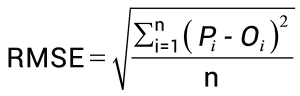

In [16]:
from IPython.display import Image
url = 'https://gisgeography.com/wp-content/uploads/2014/07/rmse-formula1-300x96.png'
Image(url, width=300, height=350)

### Get relevant data

In [22]:
# Set directory
import os
path = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\Data'

# Move to directory with the data
os.chdir(path)

# Check
os.getcwd()
os.listdir()

['01-ign.csv',
 '02-winequality-red.csv',
 '02-winequality-white.csv',
 '03-thanksgiving-2015-poll-data.csv',
 '05-ibm-sales-loss.csv',
 '07-test.csv',
 '07-train.csv',
 '09-house-test.csv',
 '09-house-train.csv']

### Import libraries & data

In [23]:
# Toolbox 101
import pandas as pd
import numpy as np
import random as rand
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Models (type it all out for practice)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR # SVC = classification

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, plot_importance 
import lightgbm as lgb

# Evaluation
from sklearn.metrics import mean_squared_error #RMSE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

# Preset data display
pd.options.display.max_seq_items = 5000
pd.options.display.max_rows = 5000

In [24]:
# Import data
train = pd.read_csv('09-house-train.csv')
test = pd.read_csv('09-house-test.csv')

In [25]:
# Check data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Drop Id column since that is not going to be useful in modeling.

In [27]:
# Drop
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [31]:
# Check
train.iloc[0:5,:3]

,MSSubClass,MSZoning,LotFrontage
0,60,RL,65.0
1,20,RL,80.0
2,60,RL,68.0
3,70,RL,60.0
4,60,RL,84.0


### Preprocessing / Cleaning
Are we able to use the data right away? Are there any null values? Is the data clean?

In [34]:
'''

Some functions to start off with:

train.sample()                                           
train.describe()
    train.describe(include=['O'])
    train.describe(include='all')
train.head()
train.tail()
train.value_counts().sum()
train.isnull().sum()
train.count()
train.fillna()
    train.fillna(train[col].mode(), inplace=True)
train.mean()
train.median()
train.mode()
train.shape
train.info()

'''

"\n\nSome functions to start off with:\n\ntrain.sample()                                           \ntrain.describe()\n    train.describe(include=['O'])\n    train.describe(include='all')\ntrain.head()\ntrain.tail()\ntrain.value_counts().sum()\ntrain.isnull().sum()\ntrain.count()\ntrain.fillna()\n    train.fillna(train[col].mode(), inplace=True)\ntrain.mean()\ntrain.median()\ntrain.mode()\ntrain.shape\ntrain.info()\n\n"

In [36]:
# Get data shape, info, columns, & dimensions
print ("*"*40)
print('********** train shape: ' + str(train.shape) + '*'*10)
print (train.info())
print ("*"*40)
print('********** test shape: ' + str(test.shape) + '*'*10)

****************************************
********** train shape: (1460, 80)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl        

There are a total of 80 columns and 1460 rows of data in the training set.

### Feature Descriptions
Here's a brief version from the website.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


### Are there any null values? Show only column names with a null data value

In [101]:
# Get null pct and counts
null_cols = pd.DataFrame(train.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
null_cols_pct = pd.DataFrame(round(train.isnull().sum().sort_values(ascending=False)/len(train),2)*100, columns=['Null Data Pct'])

# Combine horizontally (axis=1) into a dataframe with column names (keys=[]) then to a data frame
null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

all_nulls = null_cols_df[null_cols_df['Null Data Pct']>0]

print('There are', len(all_nulls), 'columns with missing values.')
all_nulls

There are 18 columns with missing values.


,Null Data Count,Null Data Pct
PoolQC,1453,100.0
MiscFeature,1406,96.0
Alley,1369,94.0
Fence,1179,81.0
FireplaceQu,690,47.0
LotFrontage,259,18.0
GarageType,81,6.0
GarageCond,81,6.0
GarageFinish,81,6.0
GarageQual,81,6.0


Looks like 5 features have 45% of NA data or more. We can try to explore the features to see if it can be useful if it's possible. PoolQC may be removeds since there the entire column has NA data.

### Ways to clean up null values
There are several methods on how to handle missing values. There are always some instances where a particular element is absent. It could be due to corrupt data, failure to load the information, never inputted in the first place, or other invalid methods of data collection. It's extremely helpful to know a few methods on how to handle the NULL/NaN values. Pandas library also provides a dropna() function that can be used to drop other columns or rows of missing data.

Some methods of dealing with NA values below:
1. Removing the rows with missing values using dropna() function
    - Use the inplace parameter: if True, do operation inplace and return None
    - Use the axis parameter: drop labels from the index (if 0) or columns (if 1)
2. Impute missing values using fillna()
    - Constant value that has meaning within the domain; ex: 0 for not present or 'Missing' for categorical
    - Value from another randomly selected record (could be random or have some business insight to add a new data point)
    - Mean, median, mode
    - Value estimated by a predictive model (random forest)
3. Binning
    - Binning the vfalues that are not present which could provide insight
4. Ignore and leave it as it is
    - Sometimes it's useful to know that there is a missing value

### How does the SalePrice distribution look like?

Let's take a look at both the SalePrice feature & create a log(SalePrice) since that's what we are going to be measured by. First let's make a data frame to store the two features.

In [66]:
# Create a dataframe to store the values
saleprice_df = pd.concat([train.SalePrice, np.log(train.SalePrice+1).rename('LogSalePrice')],
                          axis=1, names=['SalePrice', 'LogSalePrice'])
saleprice_df.head()

,SalePrice,LogSalePrice
0,208500,12.247699
1,181500,12.109016
2,223500,12.317171
3,140000,11.849405
4,250000,12.429220


Text(0.5, 1.0, 'LogSalePrice Distribution')

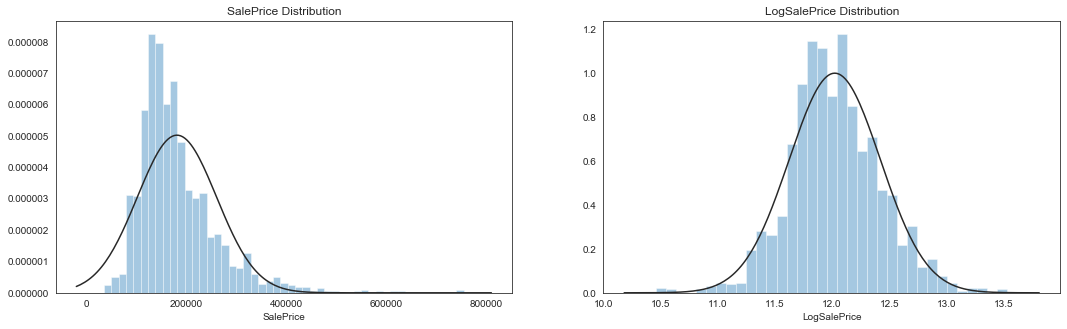

In [96]:
sns.set_style("white")
sns.set_color_codes(palette='deep')

# Create figure space
fig, ax = plt.subplots(figsize=(18,5), ncols=2, nrows=1)

# Create a distribution plot
ax1 = sns.distplot(saleprice_df.SalePrice, kde=False, fit=norm, ax=ax[0])
ax2 = sns.distplot(saleprice_df.LogSalePrice, kde=False, fit=norm, ax=ax[1])

# Set plot features
ax1.set_title('SalePrice Distribution')
ax2.set_title('LogSalePrice Distribution')

In [98]:
# Skewness and kurtosis
print('Skewness: %f' % train['SalePrice'].skew())
print('Kurtosis: %f' % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Skewness
Doc Def: For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

### Kurtosis
Doc Def: Kurtosis is the fourth central moment divided by the square of the variance. If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution.

If bias is False then the kurtosis is calculated using k statistics to eliminate bias coming from biased moment estimators

So there is a unimodal left skew on the SalePrice feature. The shape of the LogSalePrice feature looks approximately normally distributed, which is a good thing. It's a lot easier to work with especially with outliers.

### Distribution Shapes
A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions, because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak which is less than the median.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions since there is a long tail in the positive direction on the number line. The mean is also to the right of the peak which is larger than the median.

#### Here's an image below indicating how each skew would look like and the summary statistic values would lie.

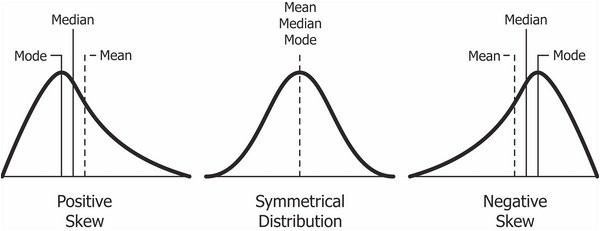

In [90]:
url = 'https://i.imgur.com/yIqX5W5.jpg'
Image(url, width=500, height=500)

In [120]:
# Return the natural logarithm of one plus the input array, element-wise.
train['LogSalePrice'] = np.log1p(train.SalePrice).head()

### Exploratory Data Analysis

The difficulty here isn’t coming up with ideas to start; it’s coming up with ideas that are likely to turn into useful insight.

We will begin plotting and identifying features that may be relevant to our dependent variable. It wil be easier to play around with the features if we split it
by data type: numerical/integer and character/factor.

### Some useful functions and examples:

Using map() to transform

- level_map = {1: 'high', 2: 'medium', 3: 'low'}

- df['c_level'] = df['c'].map(level_map)
    
Using value_count()

- df['c'].value_counts()

- There’re some useful tricks / arguments of it:
    1. normalize = True: if you want to check the frequency instead of counts.
    2. dropna = False: if you also want to include missing values in the stats.
    3. df['c'].value_counts().reset_index(): if you want to convert the stats table into a pandas dataframe and manipulate it
    4. df['c'].value_counts().reset_index().sort_values(by='index') : show the stats sorted by distinct values in column ‘c’ instead of counts.

- df['c'].value_counts().sort_index()) # Using without .reset_index()

Selecting rows with certain IDs

- df_filter = df['ID'].isin(['A001','C022',...])
- df[df_filter]

In [121]:
# Count data types in the train dataset
train.dtypes.value_counts()

object     43
int64      34
float64     4
dtype: int64

In [122]:
# Find numeric features
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = train.select_dtypes(include=num_dtypes)

# Find all other features
col_data = train.select_dtypes(include=['object'])

In [123]:
print(num_data.head(2))
print(col_data.head(2))

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  OpenPorchSF  \
0          2003       196.0         706           0  ...           61   
1          1976         0.0         978           0  ...            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   

   SalePrice  LogSalePrice  
0     208500     12.247699  
1     181500     12.109016  

[2 rows x 38 columns]
  MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl   

Let's plot the numerical features now and see if there are multicollinearity within the dataset. Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent (causing bias if left alone). If the degree of correlation between the variables is high enough, it can cause problems when you fit a model and interpret the results (skew).

We can take a look at a correlation plot to identify variables that fit this category or check if the variance inflation factor (VIF) > 10 (highly correlated).

How do we choose between which variable should we keep if they are correlated? We can apply some statistical tests to see which variable may be more beneficial
for the dependent variable. Some tests involve one-way t-tests (2 independent variables) and ANOVA (multiple variables), choosing the one with the highest R^2 value or a simple regression and check the values after.

Another way is to do some form of dimensionality reduction. Principal component analysis is a popular method to reduce dimensionality when there are a lot of features.

One way I have not tested yet is to combine both variables to create a new super variable that be beneficial for the model. Beware that combining may have same results.

Now let's do some correlation analysis and see if there is multicollinearity involved.


### Correlation to LogSalePrice

In [124]:
# Correlation to LogSalePrice feature
pd.DataFrame(abs(num_data.corr()['LogSalePrice']).sort_values(ascending=False))

,LogSalePrice
LogSalePrice,1.000000
SalePrice,0.996025
YrSold,0.956300
YearBuilt,0.934850
YearRemodAdd,0.889592
MasVnrArea,0.875974
HalfBath,0.864130
EnclosedPorch,0.854261
FullBath,0.854261
MoSold,0.768364


YrSold has the highest correlation based off of the pearson's correlation which is the standard correlation coefficient. The second is YrBuilt, which makes sense when the year built is closely correlated to the year sold.

- In statistics, the correlation coefficient r measures the strength and direction of a linear relationship. don't get this mixed upwith coefficient of determination which is the r^2 which shows percentage of variation in y which is explained by the x variables.
    - when Pearson's r is close to 1 that means there is a strong relationship between the two variables
    - when Pearson's r is close to 0 that means there is a weak relationship between the two variables

### Coefficient of Determination (R-Squared)

In [126]:
# Top Features
r_squared = num_data.corr()**2
r_squared.LogSalePrice.sort_values(ascending=False)

LogSalePrice     1.000000
SalePrice        0.992066
YrSold           0.914509
YearBuilt        0.873944
YearRemodAdd     0.791373
MasVnrArea       0.767331
HalfBath         0.746720
EnclosedPorch    0.729762
FullBath         0.729762
MoSold           0.590383
LotArea          0.395691
OpenPorchSF      0.367604
BedroomAbvGr     0.357432
LotFrontage      0.352256
GrLivArea        0.291727
OverallQual      0.257239
TotRmsAbvGrd     0.176775
TotalBsmtSF      0.174402
BsmtFinSF1       0.174146
2ndFlrSF         0.173424
GarageArea       0.170214
GarageYrBlt      0.087708
GarageCars       0.043829
OverallCond      0.041648
BsmtHalfBath     0.041648
BsmtFullBath     0.041648
BsmtUnfSF        0.035106
WoodDeckSF       0.030014
Fireplaces       0.020520
1stFlrSF         0.002953
MSSubClass       0.000076
BsmtFinSF2            NaN
LowQualFinSF          NaN
KitchenAbvGr          NaN
3SsnPorch             NaN
ScreenPorch           NaN
PoolArea              NaN
MiscVal               NaN
Name: LogSal

The coefficient of determination provides a 'goodness of fit' measure for the predictions to the observations. This is a value between 0 and 1. It's the proportion of the variance in the dependent variable (y) that is predictable from the independent variable (x).

There looks like ba a handful of numerical features that are highly correlated to the LogSalePrice feature. YrSold has a 99% explanation for the dependent variable. This could be an example of multicollinearity. 

### Create a heatmap

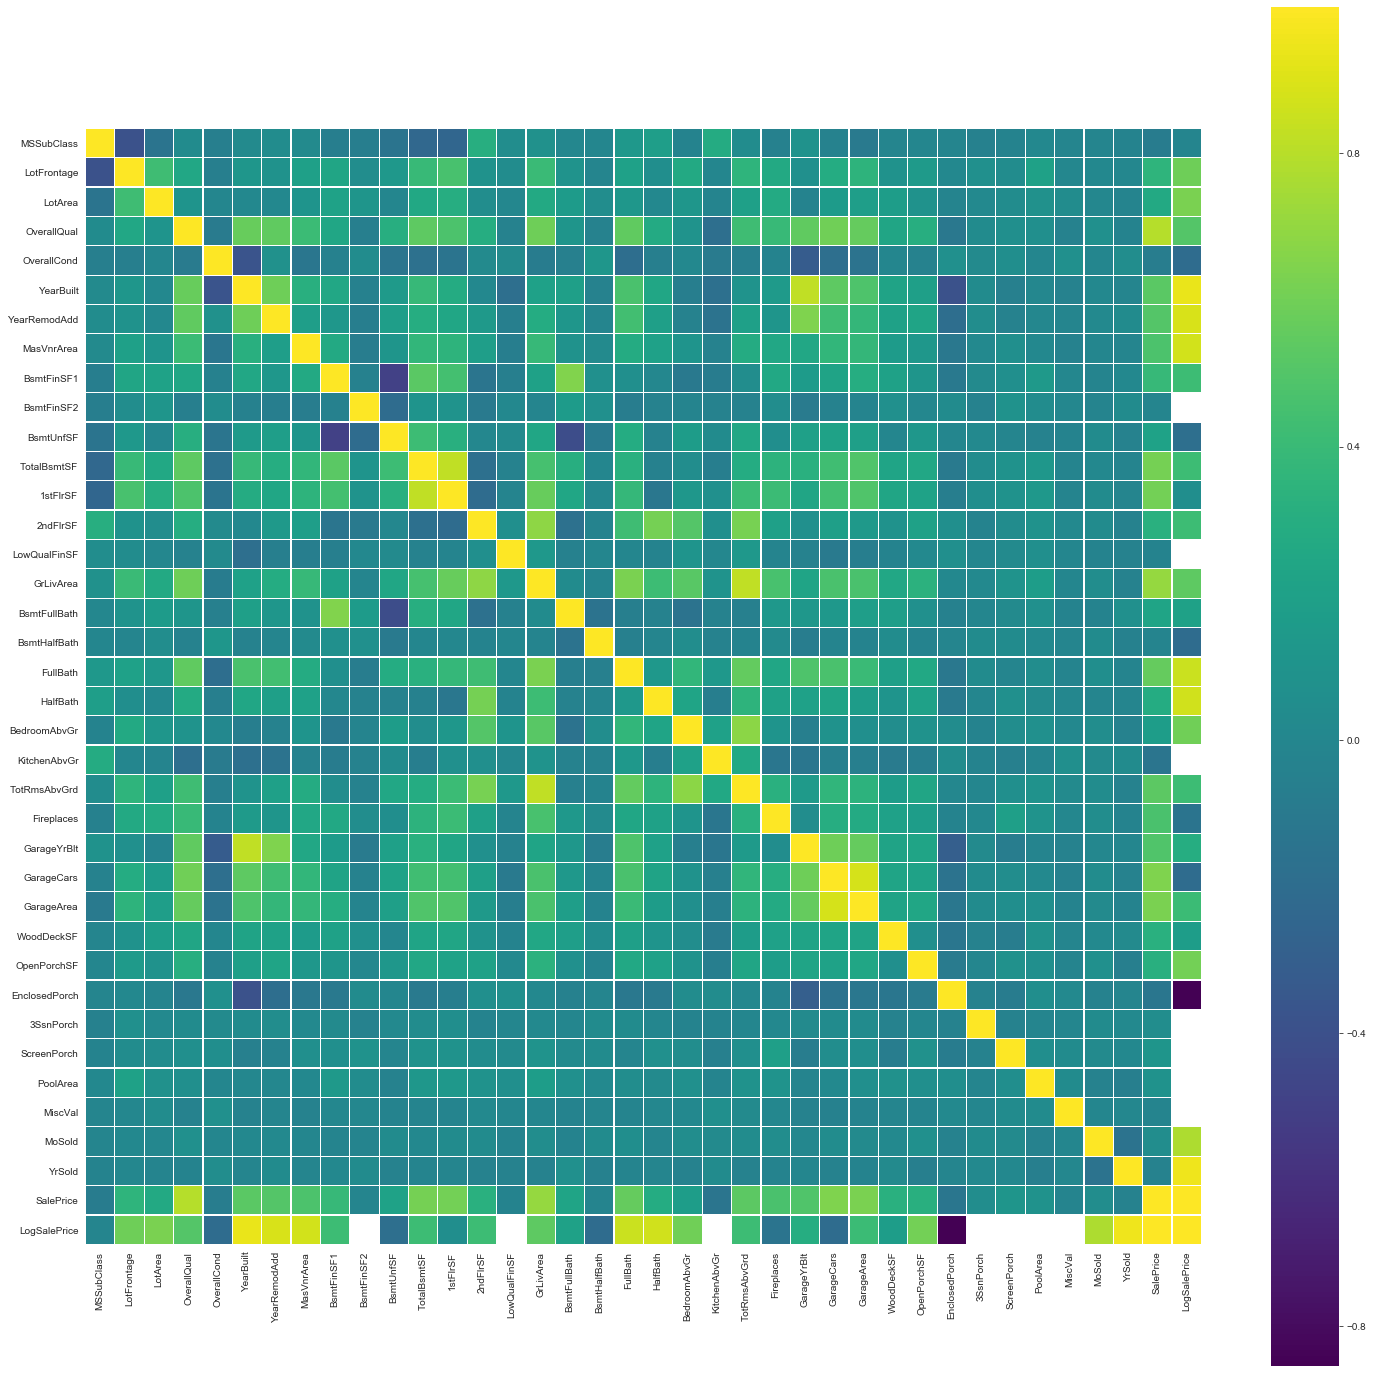

In [139]:
# Create a figure space
plt.subplots(figsize=(25,25))

# Create matrix
sns.heatmap(num_data.corr(),
#             annot=True,
            cmap='viridis', # YlGnBu, RdBu_r
            linewidths=0.20,
            linecolor='white',
            vmax=1,
            square=True,
            fmt='.1g',
            annot_kws={"size": 12})

This is kind of hard to see with all of the variables but anything that is close to yellow or dark blue indicates a decent positive or negative correlation.

Let's take a look visually now that we have all values in the feature populated. We can use matplotlib and its functions to:
1. Create a figure space
2. Plot the data
3. Update any figure settings

**Before modeling, create plots togther in 1 figure space that will pair up the train vs test distributions to see if distributions vary a lot later.**

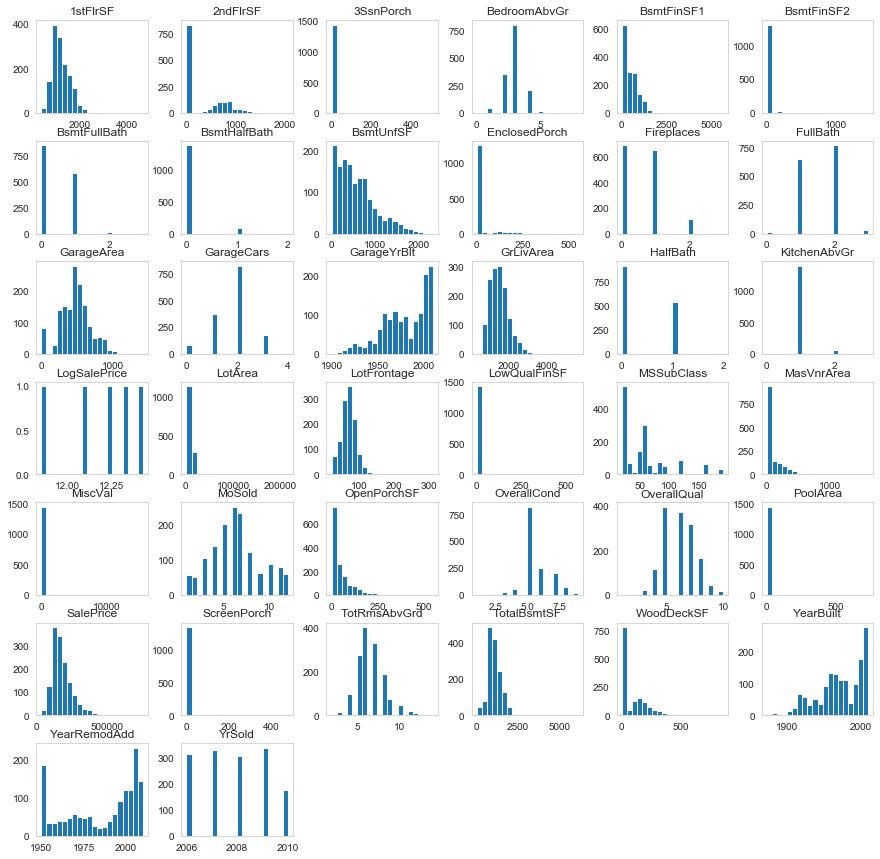

In [152]:
sns.set_style('whitegrid')
train.hist(bins=20, figsize=(15,15), grid=False)
plt.show();

### OverallQual feature

Text(0.5, 1.0, 'Overall Quality vs. SalePrice')

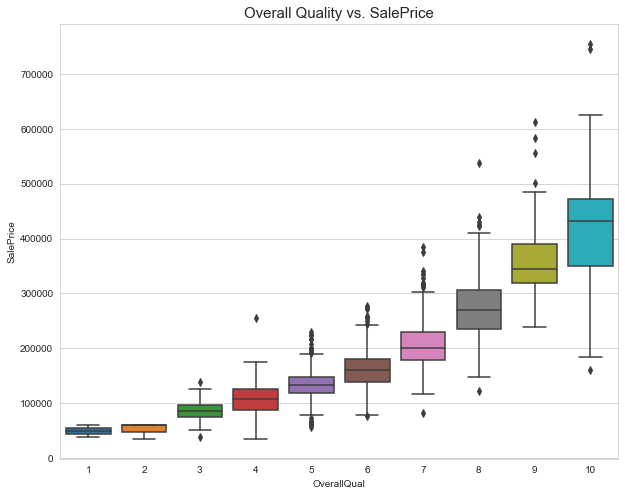

In [153]:
# Create figure space
fig, ax = plt.subplots(figsize=(10,8))

# Create boxplot
ax = sns.boxplot(x=train.OverallQual,
                 y=train.SalePrice,
                 data=train)

# Set plot features
ax.set_title('Overall Quality vs. SalePrice', fontsize=15)

As expected, the sale price will be a lot higher when the overall quality is large as well. Who would want to pay a hefty price for a low quality house?

### YearBuilt feature

Text(0, 0.5, 'Sale Price')

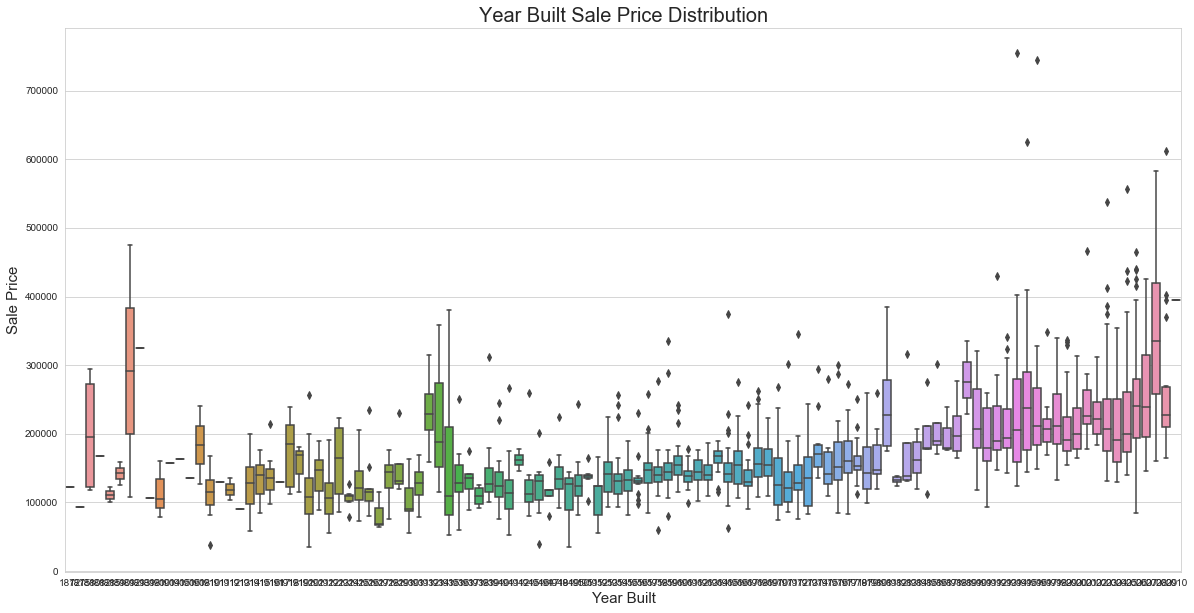

In [160]:
# Create figure space
fig, ax = plt.subplots(figsize=(20,10))

# Create boxplot
ax = sns.boxplot(x=train.YearBuilt,
                 y=train.SalePrice,
                 data=train)

# Set plot features
ax.set_title('Year Built Sale Price Distribution', fontsize=20)
ax.set_xlabel('Year Built', fontsize=15)
ax.set_ylabel('Sale Price', fontsize=15)

We can see the mean/median values of prices going up as the year built is more recent compared to the past. This is useful as it gives us an idea that more modern homes are going to be more costly due to many home factors that we are going to plot out like square footage.

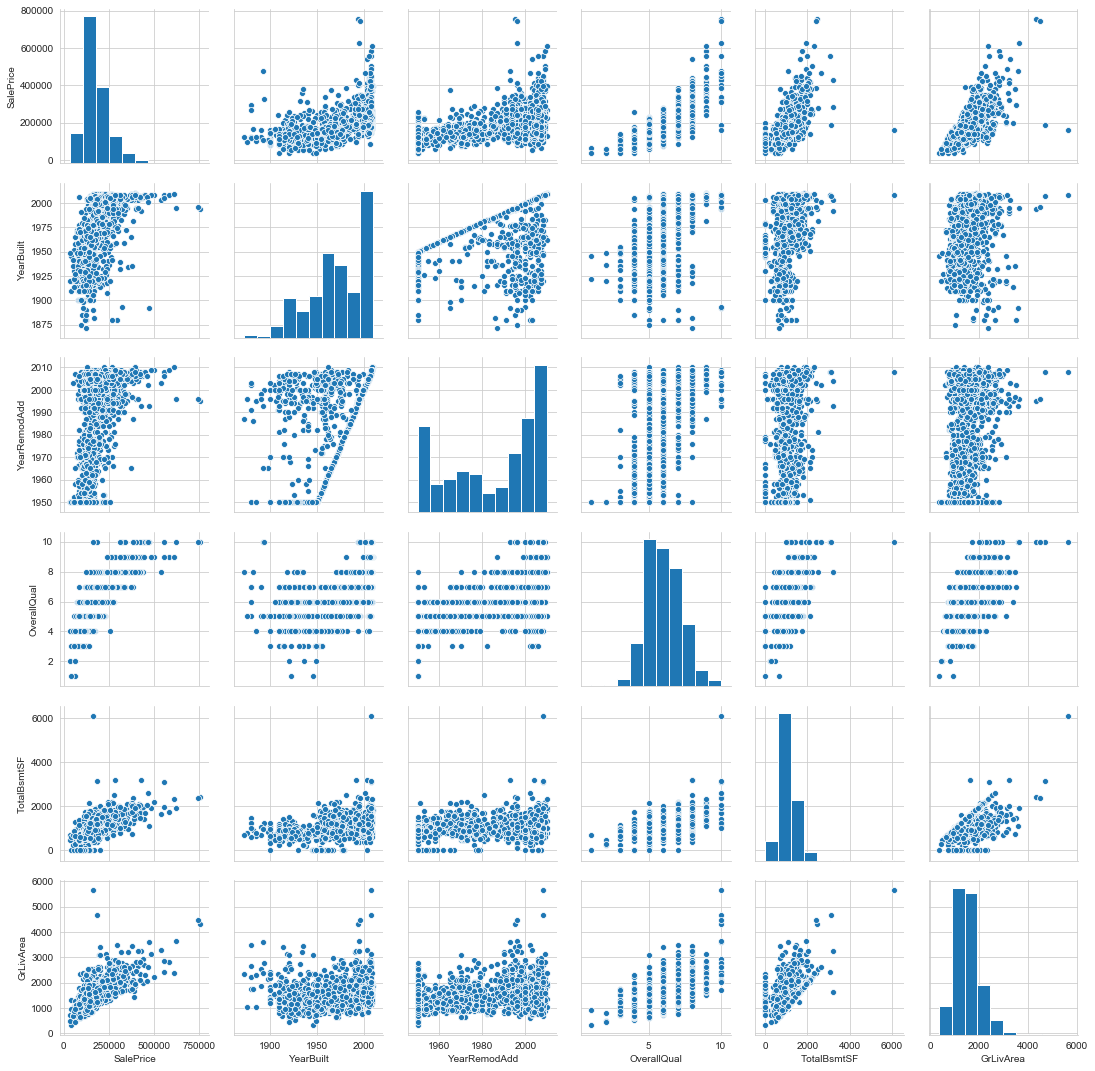

In [164]:
# Some numerical features
plot_list = ['SalePrice', 'YearBuilt', 'YearRemodAdd', 'OverallQual', 'TotalBsmtSF', 'GrLivArea']

# Plot pairplot
sns.pairplot(train[plot_list])

All the features seem to have some slight positive correlation to the sales price as the values move towards the right of the x-axis. The newer the year the house was built to the GrLiv/Area feature increases the sale price.

### Month Sold feature

Text(0, 0.5, 'Sale Price')

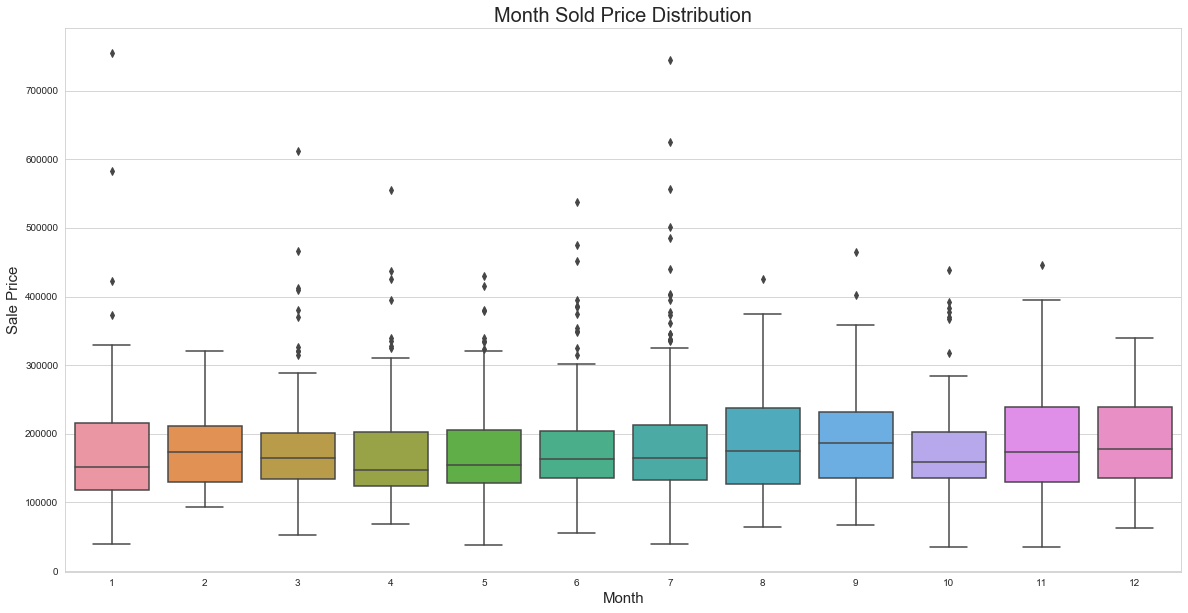

In [165]:
# Create figure space
fig, ax = plt.subplots(figsize=(20,10))

# Create boxplot
ax = sns.boxplot(x=train.MoSold,
                 y=train.SalePrice,
                 data=train)

# Set plot features
ax.set_title('Month Sold Price Distribution', fontsize=20)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Sale Price', fontsize=15)

Although the distribution looks pretty even throughout the year, there are a lot more outliers as we approach spring throughout summer. The outliers are all higher prices with none under the first quartile value. 

I can make some assumptions that prices are likely going to be higher in the summer or that people are more likely going to purchase in the summer/spring time.

Text(0, 0.5, 'Density')

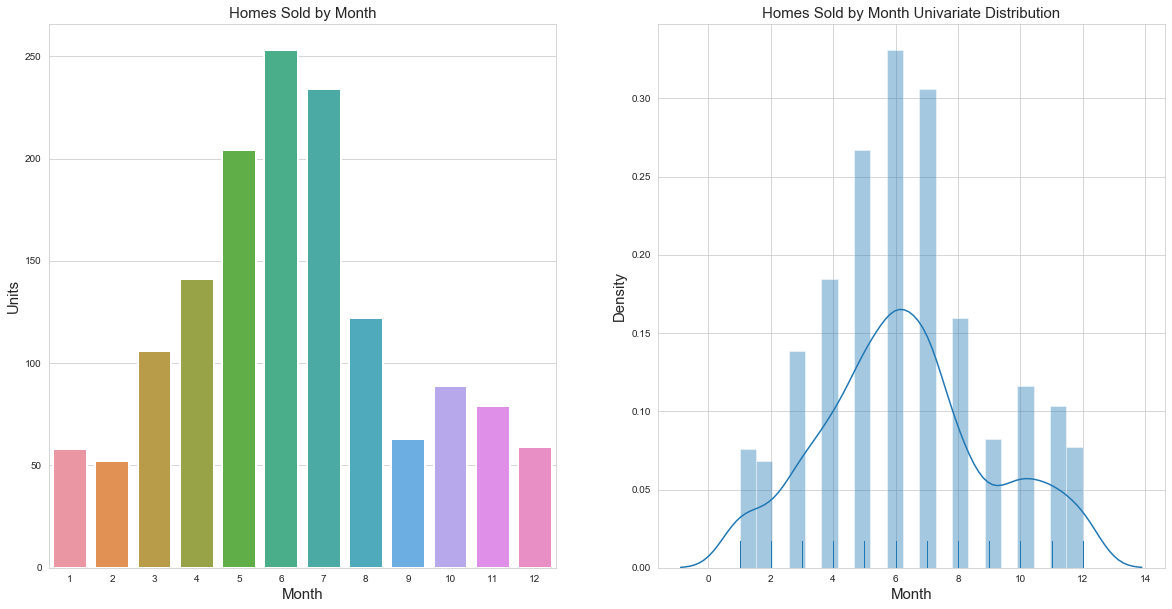

In [199]:
# Set figure space
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

# Create countplot()
ax1 = sns.countplot(x='MoSold',
                   data=train,
                   linewidth=2,
                   ax=ax[0]
                   )

ax2 = sns.distplot(train.MoSold, rug=True, ax=ax[1]) 

# # Plot the distribution with a histogram and maximum likelihood gaussian distribution fit
# ax2 = sns.distplot(train.MoSold, rug=True, fit=norm, kde=False, ax=ax[1]) 

# Set plot features
ax1.set_title('Homes Sold by Month', fontsize=15)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Units', fontsize=15)

ax2.set_title('Homes Sold by Month Univariate Distribution', fontsize=15)
ax2.set_xlabel('Month', fontsize=15)
ax2.set_ylabel('Density', fontsize=15)

With the outlier data shown in the boxplots earlier combined with these count and density plots, we can confirm a little more on the assumptions that homes are more often bought starting from spring throughout the summer until autumn where it drops significantly. School time also begins in August for semester systems and September for quarter systems. This could be good to pair up with family size data including ages of each family member and any other demographic data.

### Year Sold feature

Text(0, 0.5, 'Sale Price')

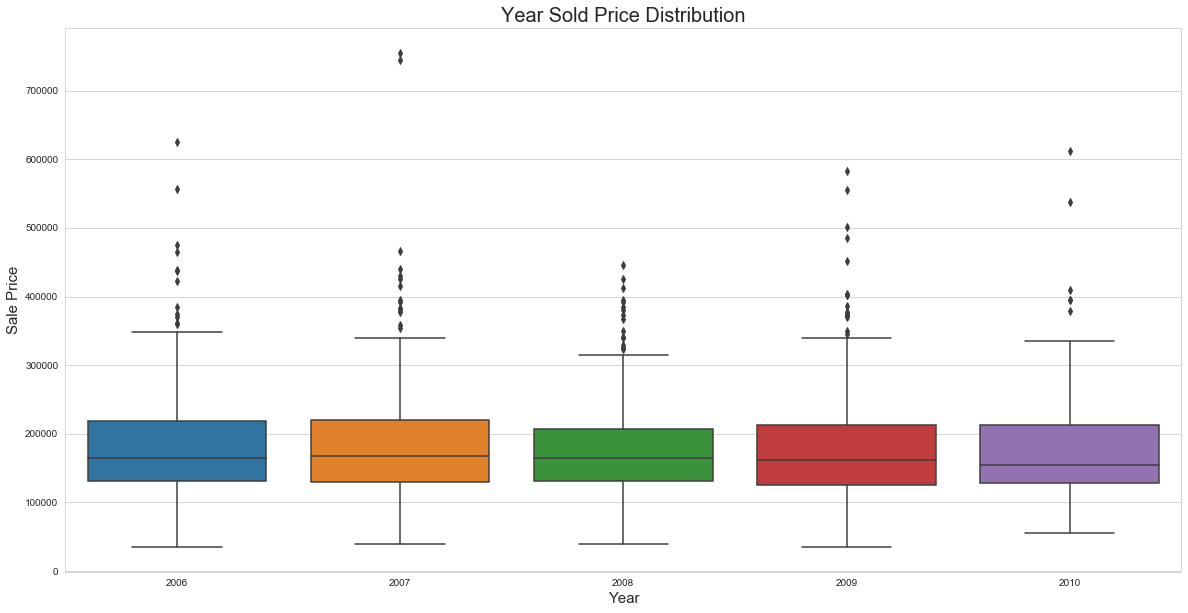

In [166]:
# Create figure space
fig, ax = plt.subplots(figsize=(20,10))

# Create boxplot
ax = sns.boxplot(x=train.YrSold,
                 y=train.SalePrice,
                 data=train)

# Set plot features
ax.set_title('Year Sold Price Distribution', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Sale Price', fontsize=15)

Can't really see anything from this.

### Scatter plot for Year Sold vs. Year Built

Text(0.5, 1.0, 'Year Built vs. Year Sold')

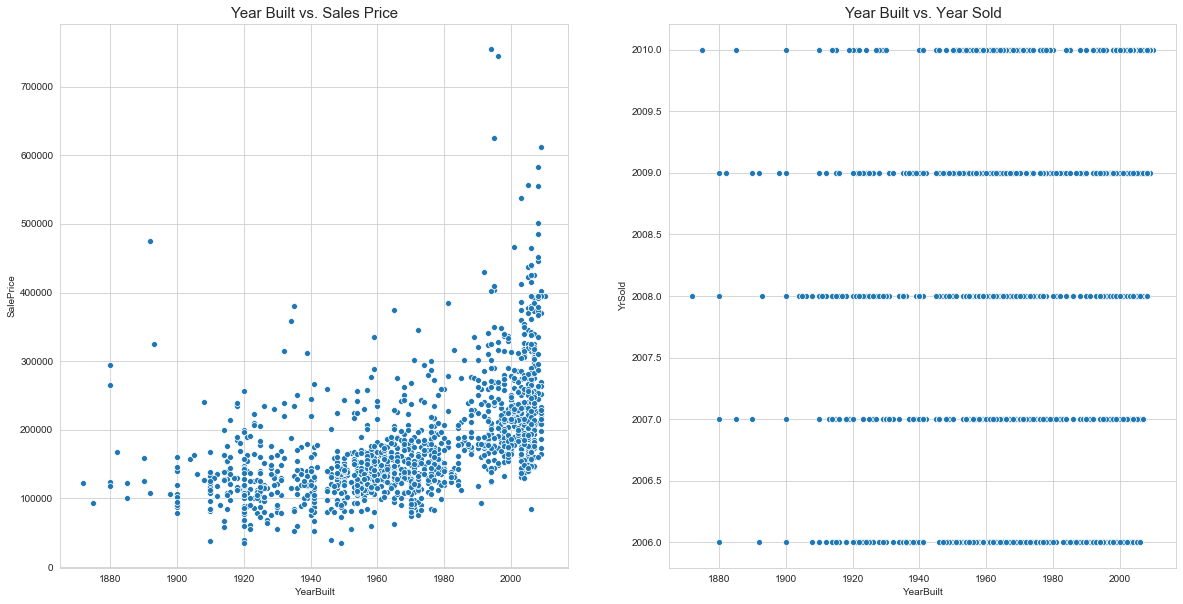

In [185]:
# Create figure space
fig, ax = plt.subplots(figsize=(20, 10), ncols=2)

# Create scatterplot
ax1 = sns.scatterplot(x='YearBuilt',
                      y='SalePrice',
                      data=train,
                      ax=ax[0])

ax2 = sns.scatterplot(x='YearBuilt',
                      y='YrSold',
                      data=train,
                      ax=ax[1])

# Set plot features
ax1.set_title('Year Built vs. Sales Price', fontsize=15)
ax2.set_title('Year Built vs. Year Sold', fontsize=15)

Should we do some chi-square tests as well to analyze some categorical variables or should I just use a linear regression and check for the likelihood ratio values? 
The chi-square test evaluates where there there is a significant associate between the categories of the two variables.

The question we should be asking since chi-square is more of a descriptive test akin to corelation. Since there is no dependent variable while
using a chi-square test, it's not a modeling technique.

So we have to ask instead: do we want to describe the strength of the relationship or do you want to model the determinants and
predict the likelihood of an outcome. In our case, a logistic regression would be more appropriate unless we want to do additional
analyses on the features.

We could do more statistical tests once we add more features in newer models.